In [1]:
# The following code includes balanced bagging classifier on churn data set
# best parameters are identified using grid search with cross validation

In [26]:
import os
os.chdir("C:\Digital Nest\Decision Trees")
print (os.getcwd())

C:\Digital Nest\Decision Trees


In [27]:
import numpy as np
import pandas as pd
churn = pd.read_csv('Churn.csv')
churn.describe()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [4]:
# target class ratio
np.unique(churn.Churn,return_counts=True)

(array([0, 1], dtype=int64), array([2850,  483], dtype=int64))

In [4]:
2850/(2850+483)

0.8550855085508551

In [5]:
churn.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
       'NightCharge', 'IntlCalls', 'IntlCharge', 'State', 'AreaCode',
       'Phone'], dtype=object)

In [6]:
# check if any NA values
churn.isnull().values.any()

False

In [7]:
# find out corrleation between day charge and day minutes
np.corrcoef(churn.DayMins,churn.DayCharge)

array([[1.        , 0.99999995],
       [0.99999995, 1.        ]])

In [8]:
np.corrcoef(churn.EveMins,churn.EveCharge)

array([[1.        , 0.99999978],
       [0.99999978, 1.        ]])

In [9]:
np.corrcoef(churn.NightMins,churn.NightCharge)

array([[1.        , 0.99999921],
       [0.99999921, 1.        ]])

In [10]:
np.corrcoef(churn.IntlMins,churn.IntlCharge)

array([[1.        , 0.99999274],
       [0.99999274, 1.        ]])

In [11]:
np.corrcoef(churn.DayCalls,churn.DayCharge)

array([[1.        , 0.00675296],
       [0.00675296, 1.        ]])

In [28]:
# remove the phone
churn = churn.iloc[::,0:20:]
print(churn.columns.values)

['AccountLength' 'VMailMessage' 'DayMins' 'EveMins' 'NightMins' 'IntlMins'
 'CustServCalls' 'Churn' 'IntlPlan' 'VMailPlan' 'DayCalls' 'DayCharge'
 'EveCalls' 'EveCharge' 'NightCalls' 'NightCharge' 'IntlCalls'
 'IntlCharge' 'State' 'AreaCode']


In [29]:
# split the file into Independent and dependent variables
churnY = churn.iloc[::,7:8:1]
print(churnY.describe())
columnsX = [0,1,2,3,4,5,6,8,9,10,12,14,16,18,19]
churnX = churn.iloc[::,columnsX]
print(churnX.describe())

             Churn
count  3333.000000
mean      0.144914
std       0.352067
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
       AccountLength  VMailMessage      DayMins      EveMins    NightMins  \
count    3333.000000   3333.000000  3333.000000  3333.000000  3333.000000   
mean      101.064806      8.099010   179.775098   200.980348   200.872037   
std        39.822106     13.688365    54.467389    50.713844    50.573847   
min         1.000000      0.000000     0.000000     0.000000    23.200000   
25%        74.000000      0.000000   143.700000   166.600000   167.000000   
50%       101.000000      0.000000   179.400000   201.400000   201.200000   
75%       127.000000     20.000000   216.400000   235.300000   235.300000   
max       243.000000     51.000000   350.800000   363.700000   395.000000   

          IntlMins  CustServCalls     IntlPlan    VMailPlan     DayCalls  \
count  3333.000000    3333.000000  3333.000000  3333.000000

In [30]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(churnX, churnY, test_size = 0.30, 
                                                    random_state = 0)
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [15]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2333, 15)
(2333, 1)
(1000, 15)
(1000, 1)


In [16]:
np.unique(churn.AreaCode,return_counts=True)

(array([408, 415, 510], dtype=int64), array([ 838, 1655,  840], dtype=int64))

In [17]:
np.unique(churn.State,return_counts=True)

(array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([ 52,  80,  55,  64,  34,  66,  74,  54,  61,  63,  54,  53,  44,
         73,  58,  71,  70,  59,  51,  65,  70,  62,  73,  84,  63,  65,
         68,  68,  62,  61,  56,  68,  62,  66,  83,  78,  61,  78,  45,
         65,  60,  60,  53,  72,  72,  77,  73,  66,  78, 106,  77],
       dtype=int64))

In [31]:
# lable encoding for strings - state
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.State = le.fit_transform(X_train.State)
print(X_train.State.describe())

count    2333.000000
mean       25.949850
std        14.840968
min         0.000000
25%        13.000000
50%        26.000000
75%        39.000000
max        50.000000
Name: State, dtype: float64


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [19]:
np.unique(X_train.State,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
       dtype=int64),
 array([43, 53, 44, 41, 20, 45, 53, 38, 47, 44, 42, 38, 33, 51, 35, 47, 54,
        39, 32, 46, 43, 46, 51, 61, 44, 45, 53, 41, 42, 47, 41, 42, 48, 44,
        58, 55, 48, 57, 29, 46, 46, 43, 36, 45, 46, 57, 43, 48, 57, 68, 58],
       dtype=int64))

In [21]:
X_train.shape

(2333, 15)

In [32]:
# apply one hot encoding on state and area
from sklearn.preprocessing import OneHotEncoder
categories = np.array([13,14])                 # column 13 represents state
OHE = OneHotEncoder(n_values = 'auto', categorical_features = categories, sparse = False, handle_unknown = 'ignore')
X_train = OHE.fit_transform(X_train)
X_train.shape

(2333, 67)

In [28]:
type(X_train)

numpy.ndarray

In [33]:
%%time
# create balanced bagging classifier
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(replacement=True,n_jobs=-1)

# perform grid search
parms = {'n_estimators': [50,100],
         'max_samples': [0.8,1.0],
         'max_features': [0.8,1.0],} 
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = bbc,param_grid = parms, scoring = 'roc_auc',cv=3,refit=True,
                  return_train_score = True,verbose=10,n_jobs=2)
CV.fit(X_train,Y_train.Churn)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    7.2s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:   11.2s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:   16.9s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:   23.6s
[Parallel(n_jobs=2)]: Done  24 out of  24 | elapsed:   29.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  24 out of  24 | elapsed:   29.0s finished


Wall time: 35.4 s


In [15]:
%%time
CVResults = pd.DataFrame(CV.cv_results_)
#print(CVResults)
CVResults.to_excel('CVResutls_BBC.xlsx')

Wall time: 1.02 s


In [34]:
print(CV.best_estimator_)

BalancedBaggingClassifier(base_estimator=None, bootstrap=True,
             bootstrap_features=False, max_features=1.0, max_samples=0.8,
             n_estimators=100, n_jobs=-1, oob_score=False,
             random_state=None, ratio='auto', replacement=True, verbose=0,
             warm_start=False)


In [35]:
print(CV.best_score_)
print(CV.best_params_)

0.9079948304316953
{'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 100}


In [36]:
# lable encoding for strings on test
X_test.State = le.transform(X_test.State)
print(X_test.State.describe())

count    1000.000000
mean       26.315000
std        14.791638
min         0.000000
25%        14.000000
50%        27.000000
75%        39.000000
max        50.000000
Name: State, dtype: float64


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [37]:
# apply one hot encoding on state and area
X_test = OHE.transform(X_test)
X_test.shape

(1000, 67)

In [38]:
# Preidct on Test data and check the confusion matrix
predictTest = CV.predict(X_test)
print(predictTest[0:10])

[1 0 0 0 1 1 1 0 0 1]


In [39]:
predictProb = CV.predict_proba(X_test)
print(predictProb[0:10])
PProb = pd.DataFrame(predictProb)

[[0.32 0.68]
 [0.94 0.06]
 [0.93 0.07]
 [1.   0.  ]
 [0.03 0.97]
 [0.12 0.88]
 [0.18 0.82]
 [0.91 0.09]
 [0.59 0.41]
 [0.42 0.58]]


In [40]:
# generate confusion matrix
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predictTest))
print (classification_report(Y_test,predictTest))

[[787  75]
 [ 21 117]]
             precision    recall  f1-score   support

          0       0.97      0.91      0.94       862
          1       0.61      0.85      0.71       138

avg / total       0.92      0.90      0.91      1000



In [41]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
# AUC for class 1
AUC = roc_auc_score(Y_test, PProb[1])
print(AUC)
# define variables for True Positive Rate and Falst Positive Rate & threshold value
TPR = dict()
FPR = dict()
THR = dict()
FPR, TPR, THR = roc_curve(Y_test, PProb[1])

0.9111268031877332


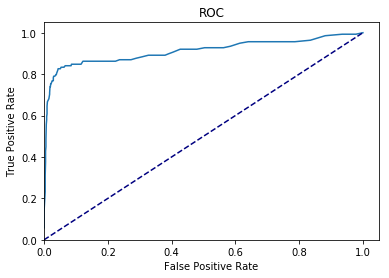

In [42]:
import matplotlib.pyplot as plt
plt.figure()
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()